In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import rmn_plot as rp

rp.set_environment()

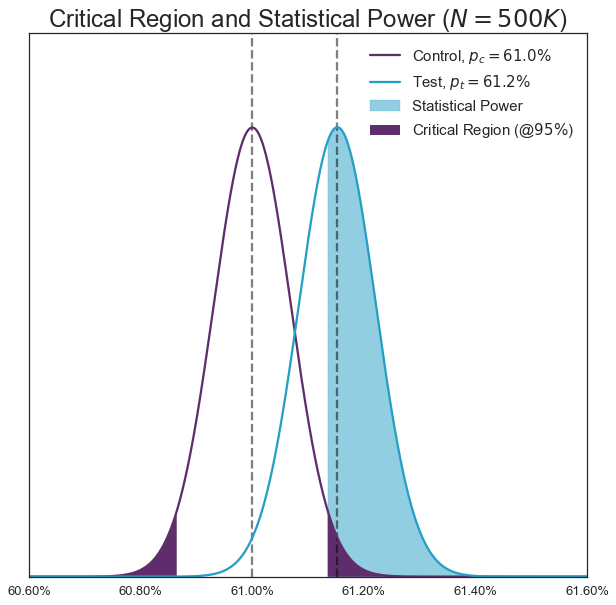

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Results!
alpha = 0.0025
p_c = 0.61
p_t = 0.61*(1.0 + alpha)
alpha = 0.95
N = np.sqrt(500000)
var_c = np.sqrt(p_c * (1 - p_c))
var_t = np.sqrt(p_t * (1 - p_t))
(left_a, right_a) = sp.stats.norm.interval(alpha, p_c, var_c/N)

control = lambda x: sp.stats.norm.pdf(x, loc=p_c, scale=var_c/N)
test = lambda x: sp.stats.norm.pdf(x, loc=p_t, scale=var_t/N)
x = np.linspace(0, 1, 100000)

_ = ax.plot(x, control(x), label="Control, $p_c = 61.0\%$")
_ = ax.plot(x, test(x), label="Test, $p_t = 61.2\%$")
_ = ax.vlines(p_c, ymin=-1, ymax=1000000, linestyles="--", alpha=0.5)
_ = ax.vlines(p_t, ymin=-1, ymax=1000000, linestyles="--", alpha=0.5)

# Critical region and power
alpha_xs_lower = [_x for _x in x if _x <= left_a]
alpha_xs_upper = [_x for _x in x if _x >= right_a]

# Statistical power! do this first so it doesn't cover up alpha
_ = ax.fill_between(alpha_xs_upper, 0, test(alpha_xs_upper), color=rp.RMN_COLOR_PALETTE[1], alpha=0.5, label="Statistical Power")

# Critical Region
_ = ax.fill_between(alpha_xs_lower, 0, control(alpha_xs_lower), label="Critical Region (@$95\%$)")
_ = ax.fill_between(alpha_xs_upper, 0, control(alpha_xs_upper), color=rp.RMN_COLOR_PALETTE[0])

# Axis props
_ = ax.set_ylim([-0.1, 700])
_ = ax.set_xlim([0.606, 0.616])
_ = ax.yaxis.set_major_formatter(plt.NullFormatter())
_ = ax.xaxis.set_major_formatter(rp.percent_format(2))

_ = plt.legend(fontsize=15)
_ = plt.title("Critical Region and Statistical Power ($N=500K$)", fontsize=24)

_ = plt.savefig("./critical_region_and_statistical_power.png")

In [54]:
left_a, right_a

(0.6086480509969358, 0.6113519490030642)

In [58]:
1 - sp.stats.norm.cdf(right_a, loc=p_t, scale=var_t/N)

0.5991145612571558

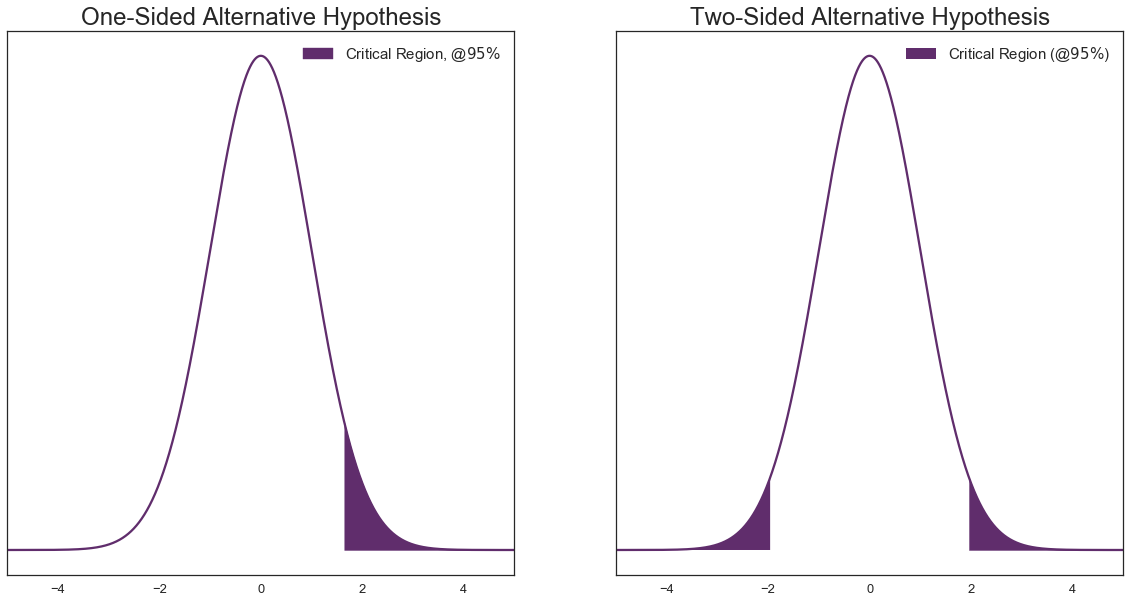

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

norm = lambda x: sp.stats.norm.pdf(x)
x = np.linspace(-10, 10, 100000)

_ = ax1.plot(x, norm(x))
_ = ax2.plot(x, norm(x))

# Critical region and power
x_0 = sp.stats.norm.ppf(0.95)
xs_upper = [_x for _x in x if _x >= x_0]

(left_a, right_a) = sp.stats.norm.interval(0.95)
alpha_xs_lower = [_x for _x in x if _x <= left_a]
alpha_xs_upper = [_x for _x in x if _x >= right_a]

# Critical Region
_ = ax1.fill_between(xs_upper, 0, norm(xs_upper), color=rp.RMN_COLOR_PALETTE[0], label="Critical Region, @$95\%$")
_ = ax2.fill_between(alpha_xs_lower, 0, norm(alpha_xs_lower), label="Critical Region (@$95\%$)")
_ = ax2.fill_between(alpha_xs_upper, 0, norm(alpha_xs_upper), color=rp.RMN_COLOR_PALETTE[0])

# Axis props
#_ = ax.set_ylim([-0.1, 700])
_ = ax1.set_xlim([-5, 5])
_ = ax1.yaxis.set_major_formatter(plt.NullFormatter())
_ = ax2.set_xlim([-5, 5])
_ = ax2.yaxis.set_major_formatter(plt.NullFormatter())
#_ = ax.xaxis.set_major_formatter(rp.percent_format(2))

_ = ax1.legend(fontsize=15)
_ = ax1.set_title("One-Sided Alternative Hypothesis", fontsize=24)
_ = ax2.legend(fontsize=15)
_ = ax2.set_title("Two-Sided Alternative Hypothesis", fontsize=24)

_ = plt.savefig("./one_two_sided.png")

In [50]:
x_0, left_a, right_a

(1.6448536269514722, -1.959963984540054, 1.959963984540054)